In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import  XGBClassifier

from src.machinelearning import *
from src.rules import *

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)

SEED = 42

In [3]:
df = pd.read_csv('../data/epfl_data.csv')
print(f'Shape of the dataframe: {df.shape}')

target = 'Stability'
X = df.drop(target, axis=1)
y = df[target].map({'s': 1, 'ns': 0})

Shape of the dataframe: (200000, 259)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=SEED)

In [1]:
# model = XGBClassifier(random_state=SEED).fit(X_train, y_train)

In [5]:
%load_ext autoreload
%autoreload 2

m = XGBModel(X_train, X_test, y_train, y_test)
m.train(n_iter=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START booster=dart, colsample_bytree=0.7222222222222222, gamma=1.0, learning_rate=0.05994842503189409, max_depth=9, min_child_weight=1, n_estimators=300, random_state=42, subsample=0.7777777777777778
[CV 2/3; 1/3] START booster=dart, colsample_bytree=0.7222222222222222, gamma=1.0, learning_rate=0.05994842503189409, max_depth=9, min_child_weight=1, n_estimators=300, random_state=42, subsample=0.7777777777777778
[CV 2/3; 3/3] START booster=dart, colsample_bytree=0.6666666666666666, gamma=0.5994842503189408, learning_rate=0.05994842503189409, max_depth=9, min_child_weight=1, n_estimators=10, random_state=42, subsample=0.5[CV 3/3; 1/3] START booster=dart, colsample_bytree=0.7222222222222222, gamma=1.0, learning_rate=0.05994842503189409, max_depth=9, min_child_weight=1, n_estimators=300, random_state=42, subsample=0.7777777777777778

: 

<Figure size 1000x600 with 0 Axes>

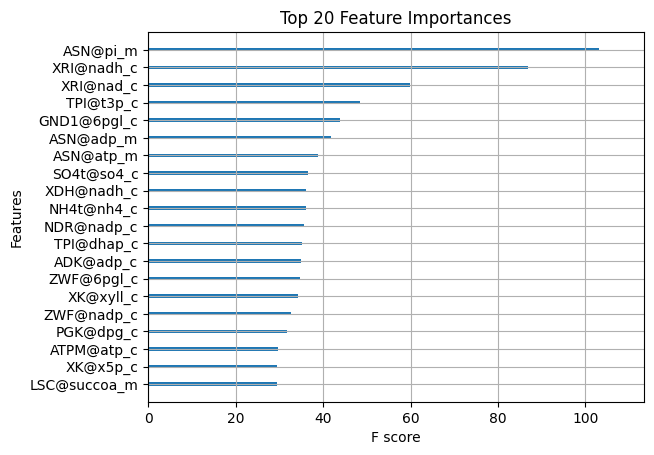

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', max_num_features=20, show_values=False)
plt.title('Top 20 Feature Importances')
plt.show()
